In [59]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
plt.rcParams['figure.figsize'] = (8,5)

In [133]:
value_array2015 = xr.open_dataset(r'D:\2015.max_temp.nc')
value_array2018 = xr.open_dataset(r'D:\2018.max_temp.nc')

In [167]:
value_array2015

<xarray.Dataset>
Dimensions:   (lat: 681, lon: 841, time: 365)
Coordinates:
  * lat       (lat) float64 -44.0 -43.95 -43.9 -43.85 ... -10.1 -10.05 -10.0
  * lon       (lon) float64 112.0 112.0 112.1 112.2 ... 153.8 153.9 153.9 154.0
  * time      (time) datetime64[ns] 2015-01-01 2015-01-02 ... 2015-12-31
Data variables:
    max_temp  (time, lat, lon) float32 ...
    crs       |S1 ...
Attributes:
    institution:       Queensland Government, Department of Environment and S...
    department_short:  DES
    department:        Department of Environment and Science
    metadata_url:      http://qldspatial.information.qld.gov.au/catalogueadmi...
    disclaimer:        1. The user accepts all responsibility and risks assoc...
    copyright:         Copyright - the State of Queensland Department of Envi...
    reference:         Jeffrey, S.J., Carter, J.O., Moodie, K.B.A. and Beswic...
    site_url:          http://www.longpaddock.qld.gov.au
    raster_source:     Gridded surface was created by interpolating observati...

In [168]:
value_array2018

<xarray.Dataset>
Dimensions:   (lat: 681, lon: 841, time: 365)
Coordinates:
  * lat       (lat) float64 -44.0 -43.95 -43.9 -43.85 ... -10.1 -10.05 -10.0
  * lon       (lon) float64 112.0 112.0 112.1 112.2 ... 153.8 153.9 153.9 154.0
  * time      (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
Data variables:
    max_temp  (time, lat, lon) float32 ...
    crs       |S1 ...
Attributes:
    department:        Department of Environment and Science
    department_short:  DES
    copyright:         Copyright - the State of Queensland Department of Envi...
    site_url:          http://www.longpaddock.qld.gov.au
    institution:       Queensland Government, Department of Environment and S...
    raster_source:     Gridded surface was created by interpolating observati...
    metadata_url:      http://qldspatial.information.qld.gov.au/catalogueadmi...
    reference:         Jeffrey, S.J., Carter, J.O., Moodie, K.B.A. and Beswic...
    disclaimer:        1. The user accepts all responsibility and risks assoc...

In [142]:
value_array2015.max_temp[0:,0:,0:].values.shape

(365, 681, 841)

In [143]:
value_array2018.max_temp[0:,0:,0:].values.shape

(365, 681, 841)

(array([2.1370000e+03, 6.8417000e+04, 6.8618200e+05, 4.6700410e+06,
        1.3496172e+07, 1.9077192e+07, 2.4234669e+07, 2.5201712e+07,
        1.3763674e+07, 1.7162990e+06]),
 array([-4.5       ,  0.82000005,  6.1400003 , 11.46      , 16.78      ,
        22.1       , 27.42      , 32.74      , 38.06      , 43.38      ,
        48.7       ], dtype=float32),
 <a list of 10 Patch objects>)

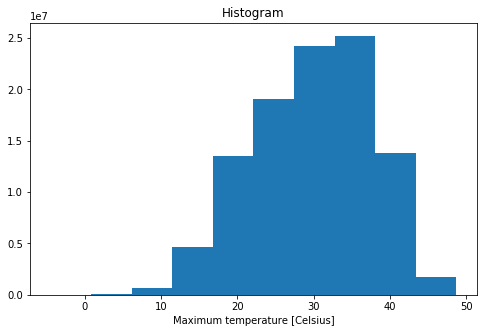

In [145]:
value_array2018.max_temp.plot(yincrease=True)

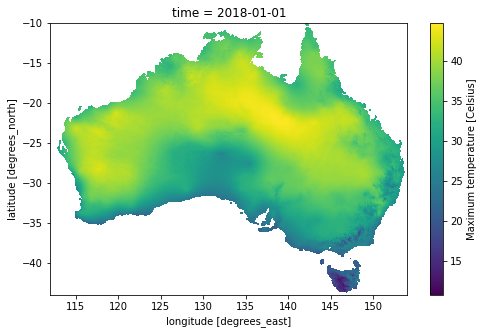

In [147]:
value_array2018.max_temp[0,0:,0:].plot(yincrease=True)

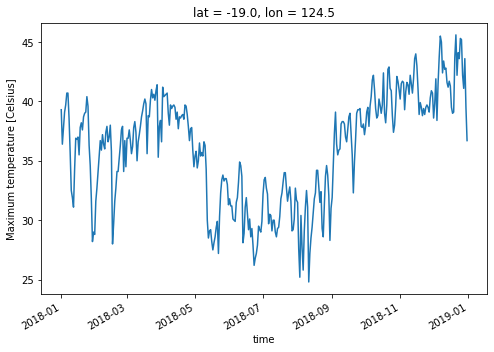

In [149]:
value_array2018.max_temp[0:,500,250].plot(yincrease=True)

In [163]:
#singular value for 2018
value_array2018.max_temp[0,500,250]

<xarray.DataArray 'max_temp' ()>
array(39.3, dtype=float32)
Coordinates:
    lat      float64 -19.0
    lon      float64 124.5
    time     datetime64[ns] 2018-01-01
Attributes:
    long_name:  Maximum temperature
    units:      Celsius

In [165]:
#singular value for 2015
value_array2015.max_temp[0,500,250]

<xarray.DataArray 'max_temp' ()>
array(38.9, dtype=float32)
Coordinates:
    lat      float64 -19.0
    lon      float64 124.5
    time     datetime64[ns] 2015-01-01
Attributes:
    units:      Celsius
    long_name:  Maximum temperature

In [187]:
#crs indicates the geographical coordinate system
value_array2015.crs

<xarray.DataArray 'crs' ()>
array(b'', dtype='|S1')
Attributes:
    semi_major_axis:              6378137.0
    grid_mapping_name:            latitude_longitude
    long_name:                    Coordinate reference system
    longitude_of_prime_meridian:  0.0
    inverse_flattening:           298.257223563

In [188]:
value_array2018.crs

<xarray.DataArray 'crs' ()>
array(b'', dtype='|S1')
Attributes:
    long_name:                    Coordinate reference system
    grid_mapping_name:            latitude_longitude
    longitude_of_prime_meridian:  0.0
    semi_major_axis:              6378137.0
    inverse_flattening:           298.257223563

### Some data analysis and examples

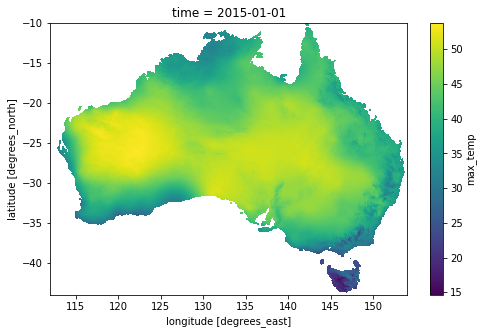

In [175]:
#Xarray dataarrays and datasets work seamlessly with arithmetic operators and numpy array functions.
#It is nice to generate climate change scenarios, e.g. 20% increase in max temp
climatechange = value_array2015.max_temp * 1.2
climatechange[0,0:,0:].plot(yincrease=True)

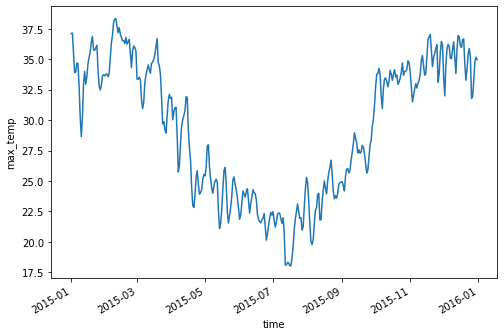

In [189]:
#National max temp mean 
value_array2015.max_temp.mean(dim=('lon', 'lat')).plot()

C:\Users\jjojeda\AppData\Local\Continuum\anaconda3\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


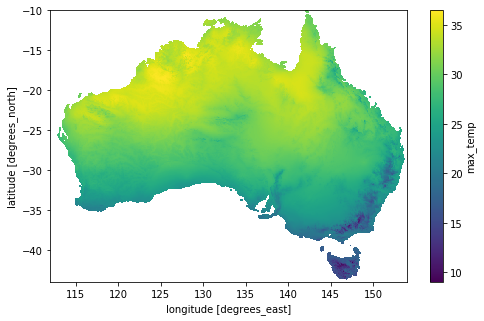

In [190]:
#Annual max temp mean
value_array2015.max_temp.mean(dim=('time')).plot()